## Tarea Semanal Nro 3
### Modelizando un ADC

#### Introducción y Fundamentos Teóricos

En esta tarea, se simula una señal senoidal $s$ utilizando los siguientes parámetros:

- **$v_{\text{max}}$**: Amplitud máxima de la señal senoidal [Volts]
- **$dc$**: Valor medio [Volts]
- **$f$**: Frecuencia [Hz]
- **$\phi$**: Fase [rad]
- **$N$**: Cantidad de muestras
- **$f_s$**: Frecuencia de muestreo [Hz]

**Importante**: La señal se normaliza para que su media sea igual a 0 y su potencia se defina como 1 Watt (para que en el grafico de densidad de potencia el pico alcance el valor de 0 ya que $log(1)=0$).

A esta señal se le agrega artificialmente un ruido analógico $nn$ con distribución normal, de manera que $s_R = s + nn$. 

Luego, se simula un ADC con los siguientes parámetros:

- **$B$**: Número de bits del ADC.
- **$V_r$**: Rango simétrico de $\pm V_f$ Volts.
- **$q=\frac{2V_r}{2^B}$**: Paso de cuantización

Se introduce la señal analógica, dando como resultado $s_{RQ}$. El ruido digital generado por el ADC, $nq$, se calcula como $nq = s_{RQ} - s_R$.

**Respecto a las potencias de ruido**

La media de la potencia del **ruido de digital** se calcula como:

$ \overline{P}_{nq} = \frac{q^2}{12} $

Este ruido debería seguir una distribución uniforme.

potencia del **ruido analógico** se determina mediante:

$ \overline{P}_{nn} = k_n \times \overline{P}_{nq} $

donde $ k_n $ es un factor de escala.




In [21]:
#%% módulos y funciones a importar
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
def generador_sen(vmax, dc, ff, ph, nn, fs):
    '''
    parametros:
    vmax:amplitud max de la senoidal [Volts]
    dc:valor medio [Volts]
    ff:frecuencia [Hz]
    ph:fase en [rad]
    nn:cantidad de muestras
    fs:frecuencia de muestreo [Hz]
    '''
    Ts= 1/fs
    tt=np.linspace(0,(nn-1)*Ts,nn)
    xx=vmax*np.sin(2*np.pi*ff*tt+ph)+dc
    return tt, xx


#### a) Generar el siguiente resultado producto de la experimentación. B = 4 bits, kn=1


In [22]:
#%% DATOS DE LA SIMULACIÓN

# Datos de la señal y su muestreo
N = 1000 # cantidad de muestras
fs = 1000 # frecuencia de muestreo [Hz]
ff = 1 # frecuencia de la señal [Hz]
A_inicial = 1 # amplitud de la señal [Volts] / nota: al normalizar la señal, esta amplitud va a cambiar. Realmente no importa que valor le dé
df = fs / N  # resolución espectral (Hz)
ts = 1 / fs  # tiempo de muestreo (segundos)

# Datos del ADC
B =  4 # bits
Vr = 2 # rango simétrico de +/- Vf Volts
q = 2*Vr/(2**B) # paso de cuantización de q Volts

# Datos del ruido analógico y digital
pot_ruido_cuant = (q**2)/12 # Watts 
kn = 1 # escala de la potencia / relación entre la potencia del ruido analógico y el ruido digital
pot_ruido_analog = pot_ruido_cuant * kn 

# Señales
tt, xx = generador_sen(A_inicial, 0, ff, 0, N, fs) # generador de la señal senoidal
xx=xx/np.std(xx) #normalizo la señal para que tenga potencia 1 W

s = xx # señal pelada
nn = np.random.normal(0,np.sqrt(pot_ruido_analog),N) # ruido analogico
sr = s + nn # señal analógica 
srq = np.round(sr/q)*q # señal digital
nq = srq-sr # ruido digital

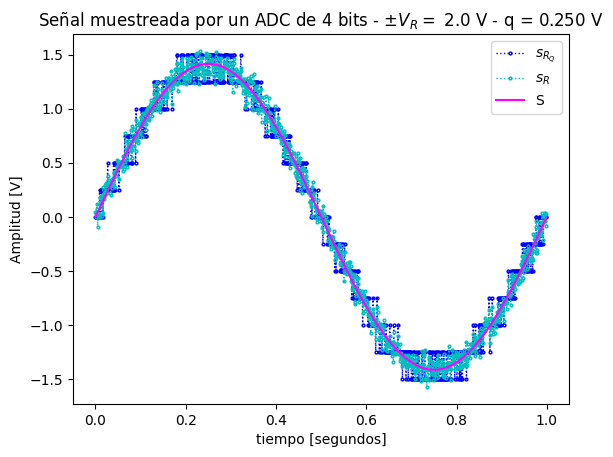

In [23]:
#%% Visualización de resultados

# ##################
# # Señal temporal
# ##################

plt.figure(1)

plt.plot(tt, srq, lw=1, linestyle=':', color='blue', marker='o', markersize=2, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='$ s_{R_Q}$')
plt.plot(tt, sr, lw=1, linestyle=':', color='c', marker='o', markersize=2, markerfacecolor='c', markeredgecolor='c', fillstyle='none', label='$ s_R $')
plt.plot(tt, s, color='magenta',label='S') 

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vr, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()


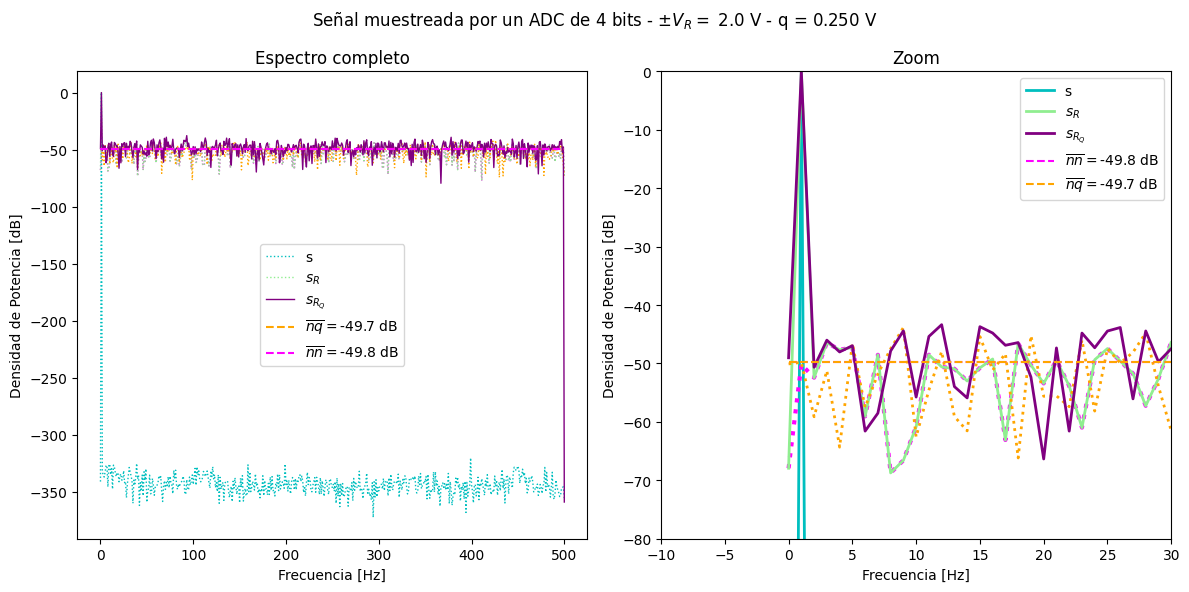

In [24]:

# #################
# # Señal espectral
# #################

# Cálculo de la transformada de Fourier
ft_S = 1/N * np.fft.fft(s)
ft_SR = 1/N * np.fft.fft(sr)
ft_Srq = 1/N * np.fft.fft(srq)
ft_Nq = 1/N * np.fft.fft(nq)
ft_Nn = 1/N * np.fft.fft(nn)

# Grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2

# Cálculo de las medias
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Título de la figura
fig.suptitle('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vr, q))


# Gráfico original en el subplot izquierdo
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=1, color='c',ls=':', label='s')
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn[bfrec])**2), lw=1, color='magenta', ls=':')
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR[bfrec])**2), lw=1, color='lightgreen', ls=':', label='$ s_R $')
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq[bfrec])**2), lw=1, color='orange', ls=':')
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq[bfrec])**2), lw=1, color='purple', label='$ s_{R_Q}$')
ax1.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean, Nnq_mean])), color='orange', ls='--', label='$ \overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean)))
ax1.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean, nNn_mean])), color='magenta', ls='--', label='$ \overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean)))

ax1.set_title('Espectro completo')
ax1.set_ylabel('Densidad de Potencia [dB]')
ax1.set_xlabel('Frecuencia [Hz]')
ax1.legend()


# Zoom en el subplot derecho

ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=2, color='c', label='s')
ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn[bfrec])**2), lw=3, color='magenta', ls=':')
ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR[bfrec])**2), lw=2, color='lightgreen', label='$ s_R $')
ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq[bfrec])**2), lw=2, color='orange', ls=':')
ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq[bfrec])**2), lw=2, color='purple', label='$ s_{R_Q}$')
ax2.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean, nNn_mean])), color='magenta', ls='--', label='$ \overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean)))
ax2.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean, Nnq_mean])), color='orange', ls='--', label='$ \overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean)))

ax2.set_title('Zoom')
ax2.set_xlim(-10, 30)
ax2.set_ylim(-80, 0)
ax2.set_ylabel('Densidad de Potencia [dB]')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.legend()


plt.tight_layout()
plt.show()




*DUDA:* En clase yo entendí que la potencia de $s_{RQ}$, es decir la sumatoria $s + nn + nq$, debería en el espectro dibujarse como la linea mas alta de entre todas las señales y en el grafico yo observo que hay ruidos que la sobrepasan. No entiendo si este es un error computacional de matlab o que, por que el dibujo de $s_R$ si se "delinea" bien.

Text(0.5, 0, 'Pasos de cuantización (q) [V]')

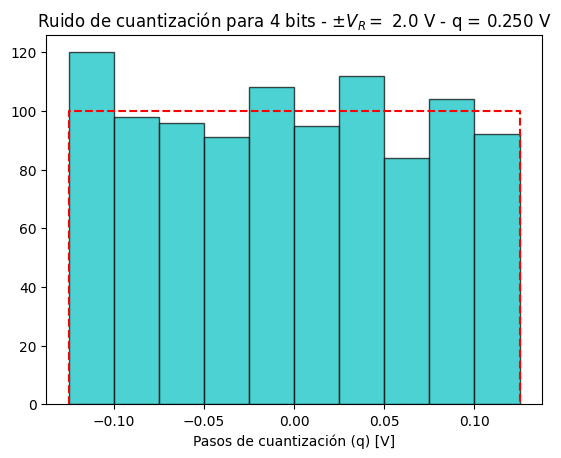

In [25]:
#.flatten()/(q)
#############
# Histograma
#############
plt.figure(3)
bins = 10
plt.hist(nq, bins=bins, edgecolor='black', color='c', alpha=0.7)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vr, q))
plt.xlabel('Pasos de cuantización (q) [V]')


#### Conclusiones:
- Se comprobó que el ruido de cuantización o ruido digital tiene una distribución uniforme
- Se graficó la señal temporal y se observaron las distorsiones que esta sufre al pasar por el ADC
- Se realizó un grafico espectral y se estudió como el proceso aditivo de ruido en la señal modifica el espectro de la misma

#### b)  Analizar para una de las siguientes configuraciones B = ̣{4, 8 y 16} bits, kn={1/10,1,10} . Discutir los resultados respecto a lo obtenido en a).

In [26]:
# Voy a seguir laburando con la misma señal, solo modifico los parametros del ADC


# CONFIGURACIÓN 0---------------------------------

# Datos del ADC
B0 = 4  # bits
q0 = 2 * Vr / (2**B0)  # paso de cuantización de q Volts

# Datos del ruido analógico y digital
pot_ruido_cuant0 = (q0**2) / 12  # Watts
kn0 = 1/10  # escala de la potencia / relación entre la potencia del ruido analógico y el ruido digital
pot_ruido_analog0 = pot_ruido_cuant0 * kn0

# Señales
nn0 = np.random.normal(0, np.sqrt(pot_ruido_analog0), N)  # ruido analogico
sr0 = s + nn0  # señal analógica
srq0 = np.round(sr0 / q0) * q0  # señal digital
nq0 = srq0 - sr0  # ruido digital

# CONFIGURACIÓN 1 --------------------------------

# Datos del ADC
B1 = 8  # bits
q1 = 2 * Vr / (2**B1)  # paso de cuantización de q Volts

# Datos del ruido analógico y digital
pot_ruido_cuant1 = (q1**2) / 12  # Watts
kn1 = 1  # escala de la potencia / relación entre la potencia del ruido analógico y el ruido digital
pot_ruido_analog1 = pot_ruido_cuant1 * kn1

# Señales
nn1 = np.random.normal(0, np.sqrt(pot_ruido_analog1), N)  # ruido analogico
sr1 = s + nn1  # señal analógica
srq1 = np.round(sr1 / q1) * q1  # señal digital
nq1 = srq1 - sr1  # ruido digital

# CONFIGURACIÓN 2---------------------------------

# Datos del ADC
B2 = 16  # bits
q2 = 2 * Vr / (2**B2)  # paso de cuantización de q Volts

# Datos del ruido analógico y digital
pot_ruido_cuant2 = (q2**2) / 12  # Watts
kn2 = 10 # escala de la potencia / relación entre la potencia del ruido analógico y el ruido digital
pot_ruido_analog2 = pot_ruido_cuant2 * kn2

# Señales
nn2 = np.random.normal(0, np.sqrt(pot_ruido_analog2), N)  # ruido analogico
sr2 = s + nn2  # señal analógica
srq2 = np.round(sr2 / q2) * q2  # señal digital
nq2 = srq2 - sr2  # ruido digital


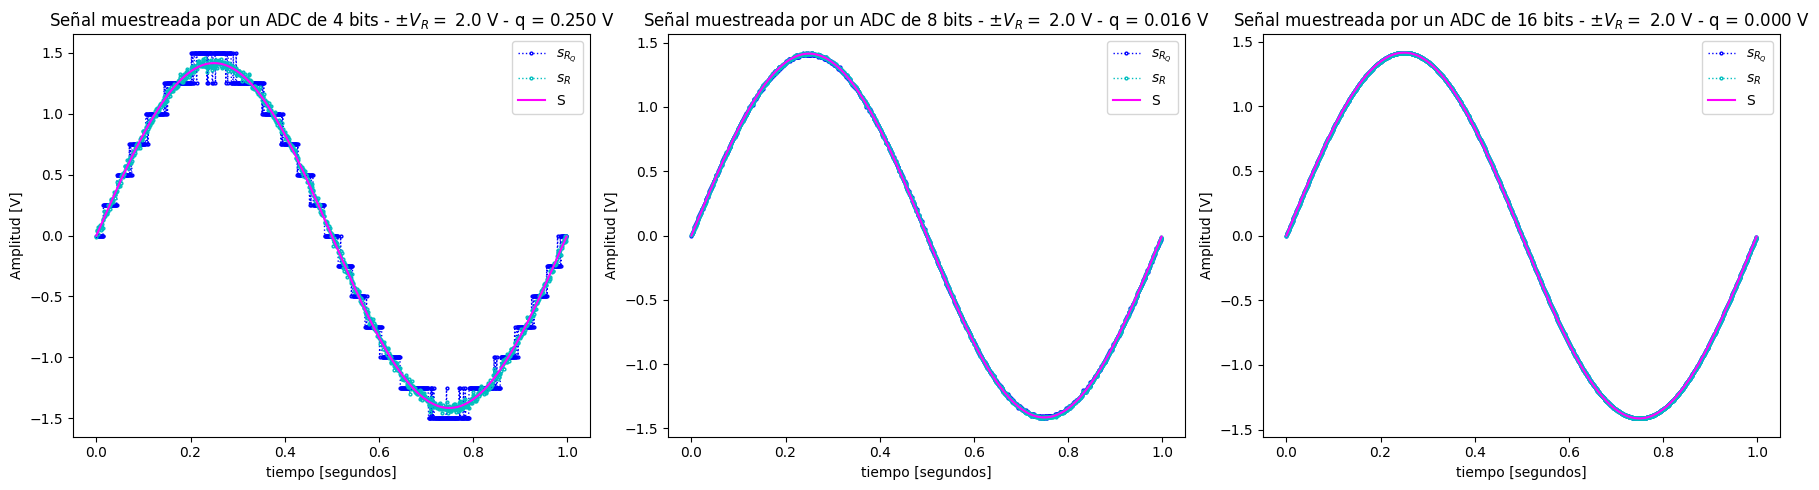

In [27]:
plt.figure(4, figsize=(18, 5))

# Configuración 0
plt.subplot(1, 3, 1)
plt.plot(tt, srq0, lw=1, linestyle=':', color='blue', marker='o', markersize=2, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='$s_{R_Q}$')
plt.plot(tt, sr0, lw=1, linestyle=':', color='c', marker='o', markersize=2, markerfacecolor='c', markeredgecolor='c', fillstyle='none', label='$s_R$')
plt.plot(tt, s, color='magenta', label='S')
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B0, Vr, q0))
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.legend()

# Configuración 1
plt.subplot(1, 3, 2)
plt.plot(tt, srq1, lw=1, linestyle=':', color='blue', marker='o', markersize=2, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='$s_{R_Q}$')
plt.plot(tt, sr1, lw=1, linestyle=':', color='c', marker='o', markersize=2, markerfacecolor='c', markeredgecolor='c', fillstyle='none', label='$s_R$')
plt.plot(tt, s, color='magenta', label='S')
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B1, Vr, q1))
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.legend()

# Configuración 2
plt.subplot(1, 3, 3)
plt.plot(tt, srq2, lw=1, linestyle=':', color='blue', marker='o', markersize=2, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='$s_{R_Q}$')
plt.plot(tt, sr2, lw=1, linestyle=':', color='c', marker='o', markersize=2, markerfacecolor='c', markeredgecolor='c', fillstyle='none', label='$s_R$')
plt.plot(tt, s, color='magenta', label='S')
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B2, Vr, q2))
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.legend()

plt.tight_layout()
plt.show()

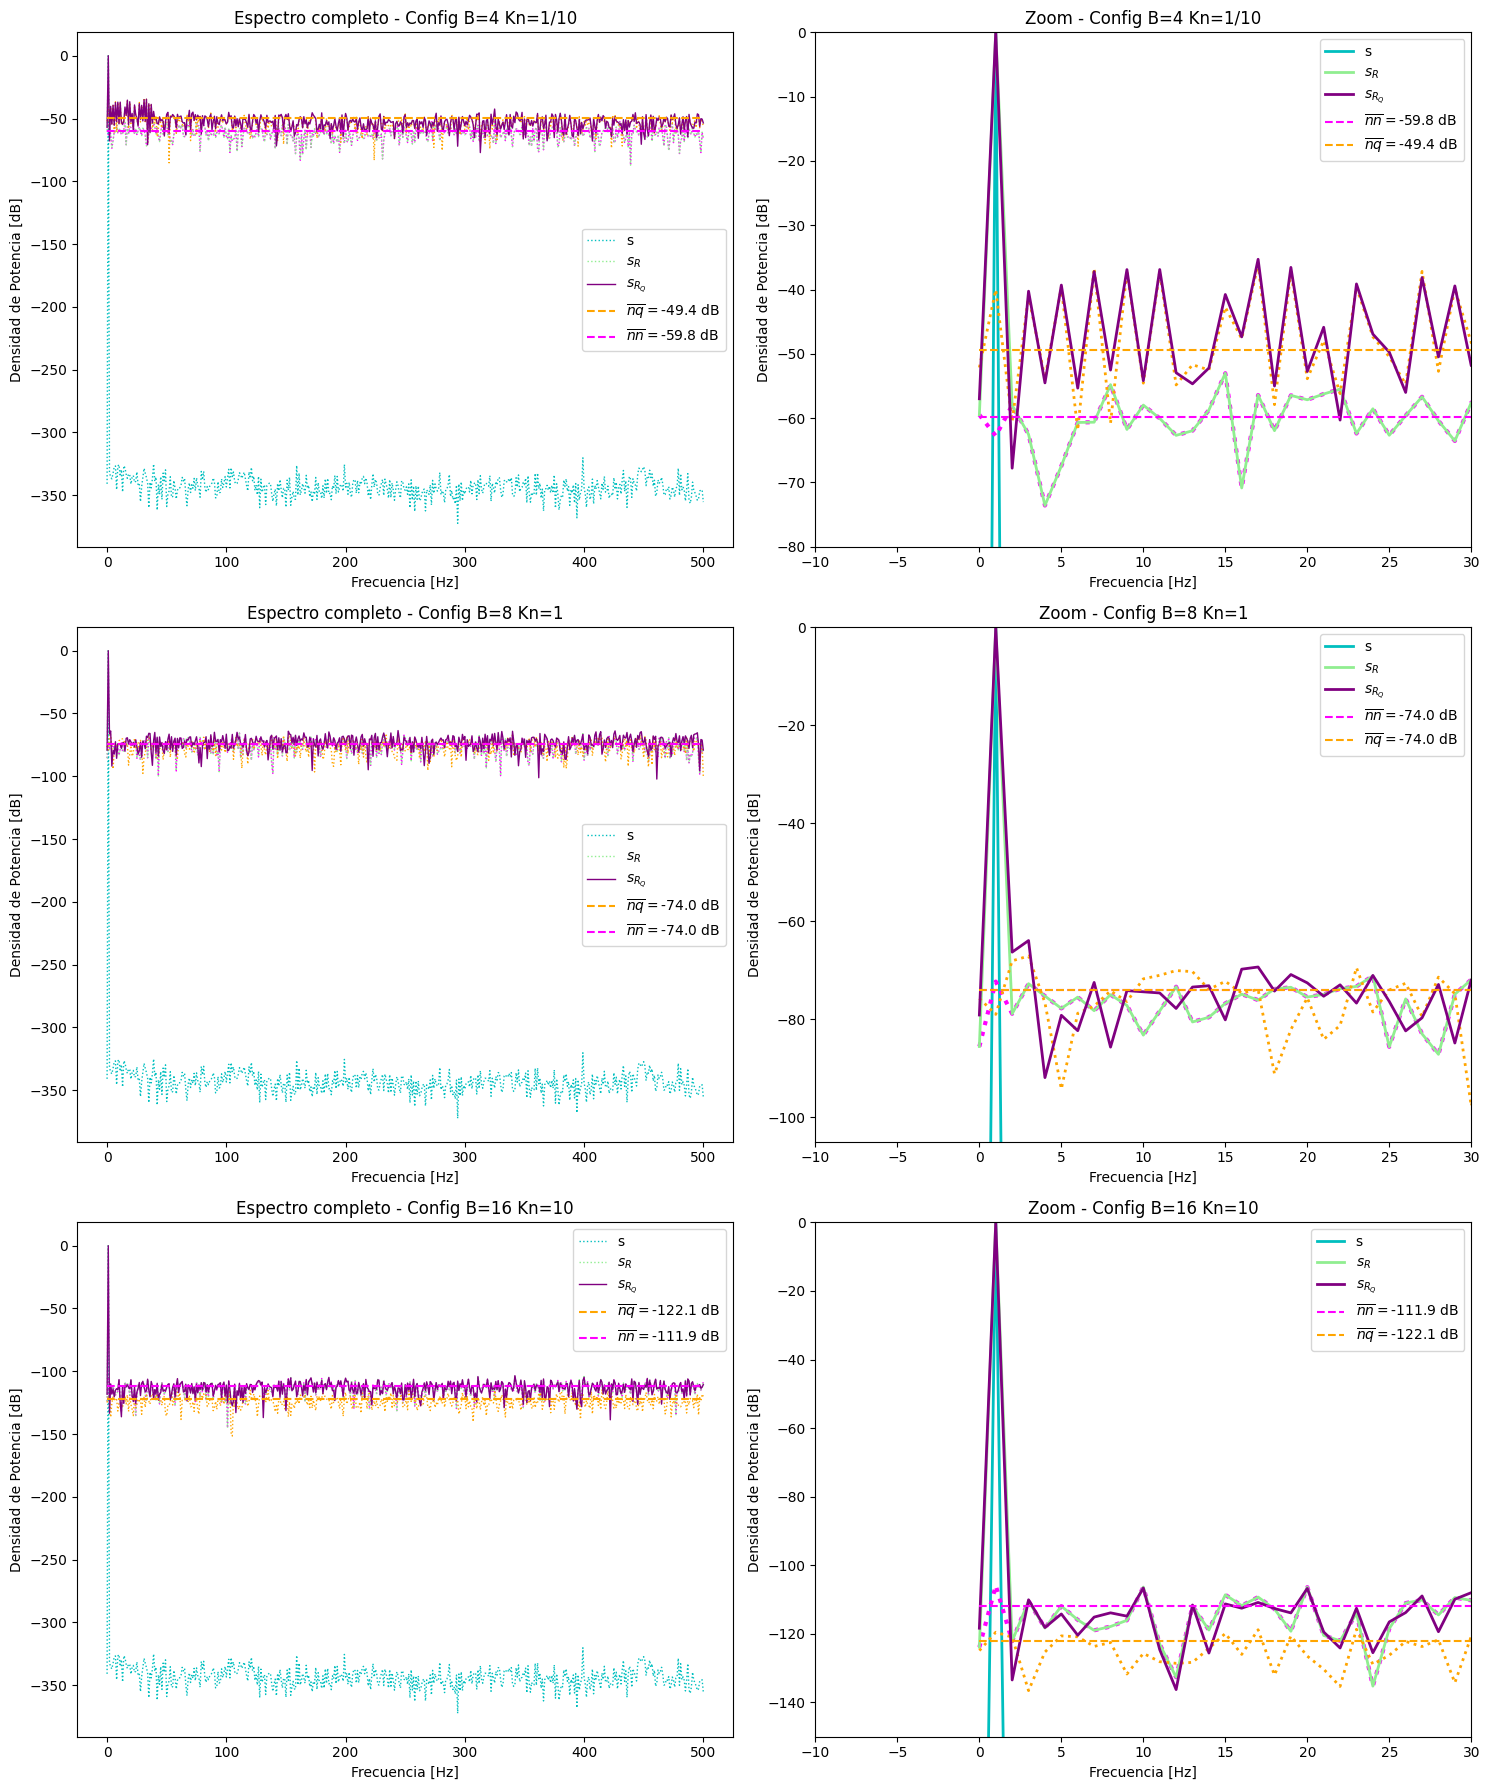

In [28]:
# #################
# # Señal espectral
# #################


# Grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2
ft_S = 1/N * np.fft.fft(s)


ft_SR0 = 1/N * np.fft.fft(sr0)
ft_Srq0 = 1/N * np.fft.fft(srq0)
ft_Nq0 = 1/N * np.fft.fft(nq0)
ft_Nn0 = 1/N * np.fft.fft(nn0)

# Cálculo de las medias
Nnq_mean0 = np.mean(np.abs(ft_Nq0)**2)
nNn_mean0 = np.mean(np.abs(ft_Nn0)**2)

# Configuración 1
ft_SR1 = 1/N * np.fft.fft(sr1)
ft_Srq1 = 1/N * np.fft.fft(srq1)
ft_Nq1 = 1/N * np.fft.fft(nq1)
ft_Nn1 = 1/N * np.fft.fft(nn1)

# Cálculo de las medias
Nnq_mean1 = np.mean(np.abs(ft_Nq1)**2)
nNn_mean1 = np.mean(np.abs(ft_Nn1)**2)

# Configuración 2
ft_SR2 = 1/N * np.fft.fft(sr2)
ft_Srq2 = 1/N * np.fft.fft(srq2)
ft_Nq2 = 1/N * np.fft.fft(nq2)
ft_Nn2 = 1/N * np.fft.fft(nn2)

# Cálculo de las medias
Nnq_mean2 = np.mean(np.abs(ft_Nq2)**2)
nNn_mean2 = np.mean(np.abs(ft_Nn2)**2)

plt.figure(figsize=(15, 18))

# Configuración 0
plt.subplot(3, 2, 1)
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=1, color='c', ls=':', label='s')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn0[bfrec])**2), lw=1, color='magenta', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR0[bfrec])**2), lw=1, color='lightgreen', ls=':', label='$s_R$')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq0[bfrec])**2), lw=1, color='orange', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq0[bfrec])**2), lw=1, color='purple', label='$s_{R_Q}$')
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean0, Nnq_mean0])), color='orange', ls='--', label='$\overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean0)))
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean0, nNn_mean0])), color='magenta', ls='--', label='$\overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean0)))
plt.title('Espectro completo - Config B=4 Kn=1/10')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=2, color='c', label='s')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn0[bfrec])**2), lw=3, color='magenta', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR0[bfrec])**2), lw=2, color='lightgreen', label='$s_R$')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq0[bfrec])**2), lw=2, color='orange', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq0[bfrec])**2), lw=2, color='purple', label='$s_{R_Q}$')
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean0, nNn_mean0])), color='magenta', ls='--', label='$\overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean0)))
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean0, Nnq_mean0])), color='orange', ls='--', label='$\overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean0)))
plt.title('Zoom - Config B=4 Kn=1/10')
plt.xlim(-10, 30)
plt.ylim(-80, 0)
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.legend()

# Configuración 1
plt.subplot(3, 2, 3)
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=1, color='c', ls=':', label='s')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn1[bfrec])**2), lw=1, color='magenta', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR1[bfrec])**2), lw=1, color='lightgreen', ls=':', label='$s_R$')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq1[bfrec])**2), lw=1, color='orange', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq1[bfrec])**2), lw=1, color='purple', label='$s_{R_Q}$')
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean1, Nnq_mean1])), color='orange', ls='--', label='$\overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean1)))
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean1, nNn_mean1])), color='magenta', ls='--', label='$\overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean1)))
plt.title('Espectro completo - Config B=8 Kn=1')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=2, color='c', label='s')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn1[bfrec])**2), lw=3, color='magenta', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR1[bfrec])**2), lw=2, color='lightgreen', label='$s_R$')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq1[bfrec])**2), lw=2, color='orange', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq1[bfrec])**2), lw=2, color='purple', label='$s_{R_Q}$')
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean1, nNn_mean1])), color='magenta', ls='--', label='$\overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean1)))
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean1, Nnq_mean1])), color='orange', ls='--', label='$\overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean1)))
plt.title('Zoom - Config B=8 Kn=1')
plt.xlim(-10, 30)
plt.ylim(-105, 0)
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.legend()

# Configuración 2
plt.subplot(3, 2, 5)
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=1, color='c', ls=':', label='s')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn2[bfrec])**2), lw=1, color='magenta', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR2[bfrec])**2), lw=1, color='lightgreen', ls=':', label='$s_R$')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq2[bfrec])**2), lw=1, color='orange', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq2[bfrec])**2), lw=1, color='purple', label='$s_{R_Q}$')
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean2, Nnq_mean2])), color='orange', ls='--', label='$\overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean2)))
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean2, nNn_mean2])), color='magenta', ls='--', label='$\overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean2)))
plt.title('Espectro completo - Config B=16 Kn=10')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=2, color='c', label='s')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn2[bfrec])**2), lw=3, color='magenta', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR2[bfrec])**2), lw=2, color='lightgreen', label='$s_R$')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq2[bfrec])**2), lw=2, color='orange', ls=':')
plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq2[bfrec])**2), lw=2, color='purple', label='$s_{R_Q}$')
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean2, nNn_mean2])), color='magenta', ls='--', label='$\overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean2)))
plt.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean2, Nnq_mean2])), color='orange', ls='--', label='$\overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean2)))
plt.title('Zoom - Config B=16 Kn=10')
plt.xlim(-10, 30)
plt.ylim(-150, 0)
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.legend()

plt.tight_layout()
plt.show()

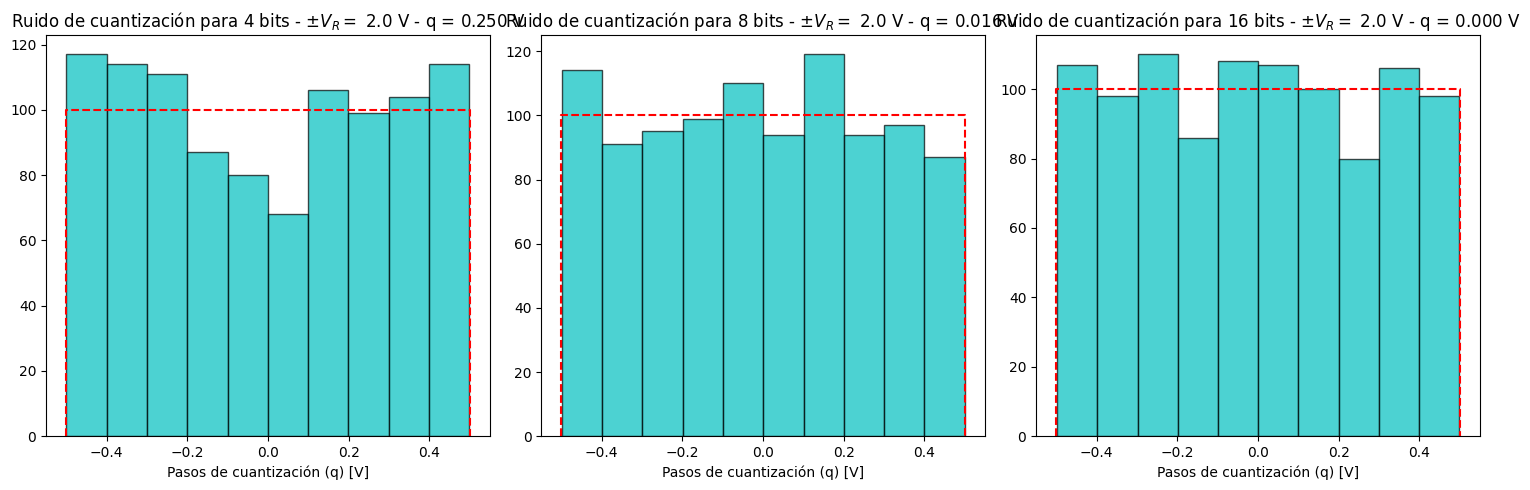

In [29]:
plt.figure(5, figsize=(15, 5))
bins = 10
plt.subplot(1, 3, 1)
plt.hist(nq0.flatten()/(q0), bins=bins, edgecolor='black', color='c', alpha=0.7)
plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B0, Vr, q0))
plt.xlabel('Pasos de cuantización (q) [V]')
plt.subplot(1, 3, 2)
plt.hist(nq1.flatten()/(q1), bins=bins, edgecolor='black', color='c', alpha=0.7)
plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B1, Vr, q1))
plt.xlabel('Pasos de cuantización (q) [V]')
plt.subplot(1, 3, 3)
plt.hist(nq2.flatten()/(q2), bins=bins, edgecolor='black', color='c', alpha=0.7)
plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B2, Vr, q2))
plt.xlabel('Pasos de cuantización (q) [V]')
plt.tight_layout()
plt.show()


#### Conclusiones
- En el dominio temporal se observa claramente que el muestreo de la señal mejora conforme aumenta la cantidad de bits del ADC
- En el dominio frecuencial se observa la relación entre el ruido de cuantización y el analógico. Cuando $Kn <1$, el ruido analógico es mayor al digital, mientas que cuando $Kn>1$ la relación se invierte. Si $Kn = 1$ entonces ambos ruidos tienen la misma media. Además, el piso de ruido digital disminuye conforme amenta la cantidad de bits del ADC
- En los histogramas de ruido digital los tres casos parecen seguir una distribución uniforme, aunque podría aventurarme a decir que esta uniformidad mejora conforme aumenta $B$.

### Bonus

Relación entre SRN y B bits

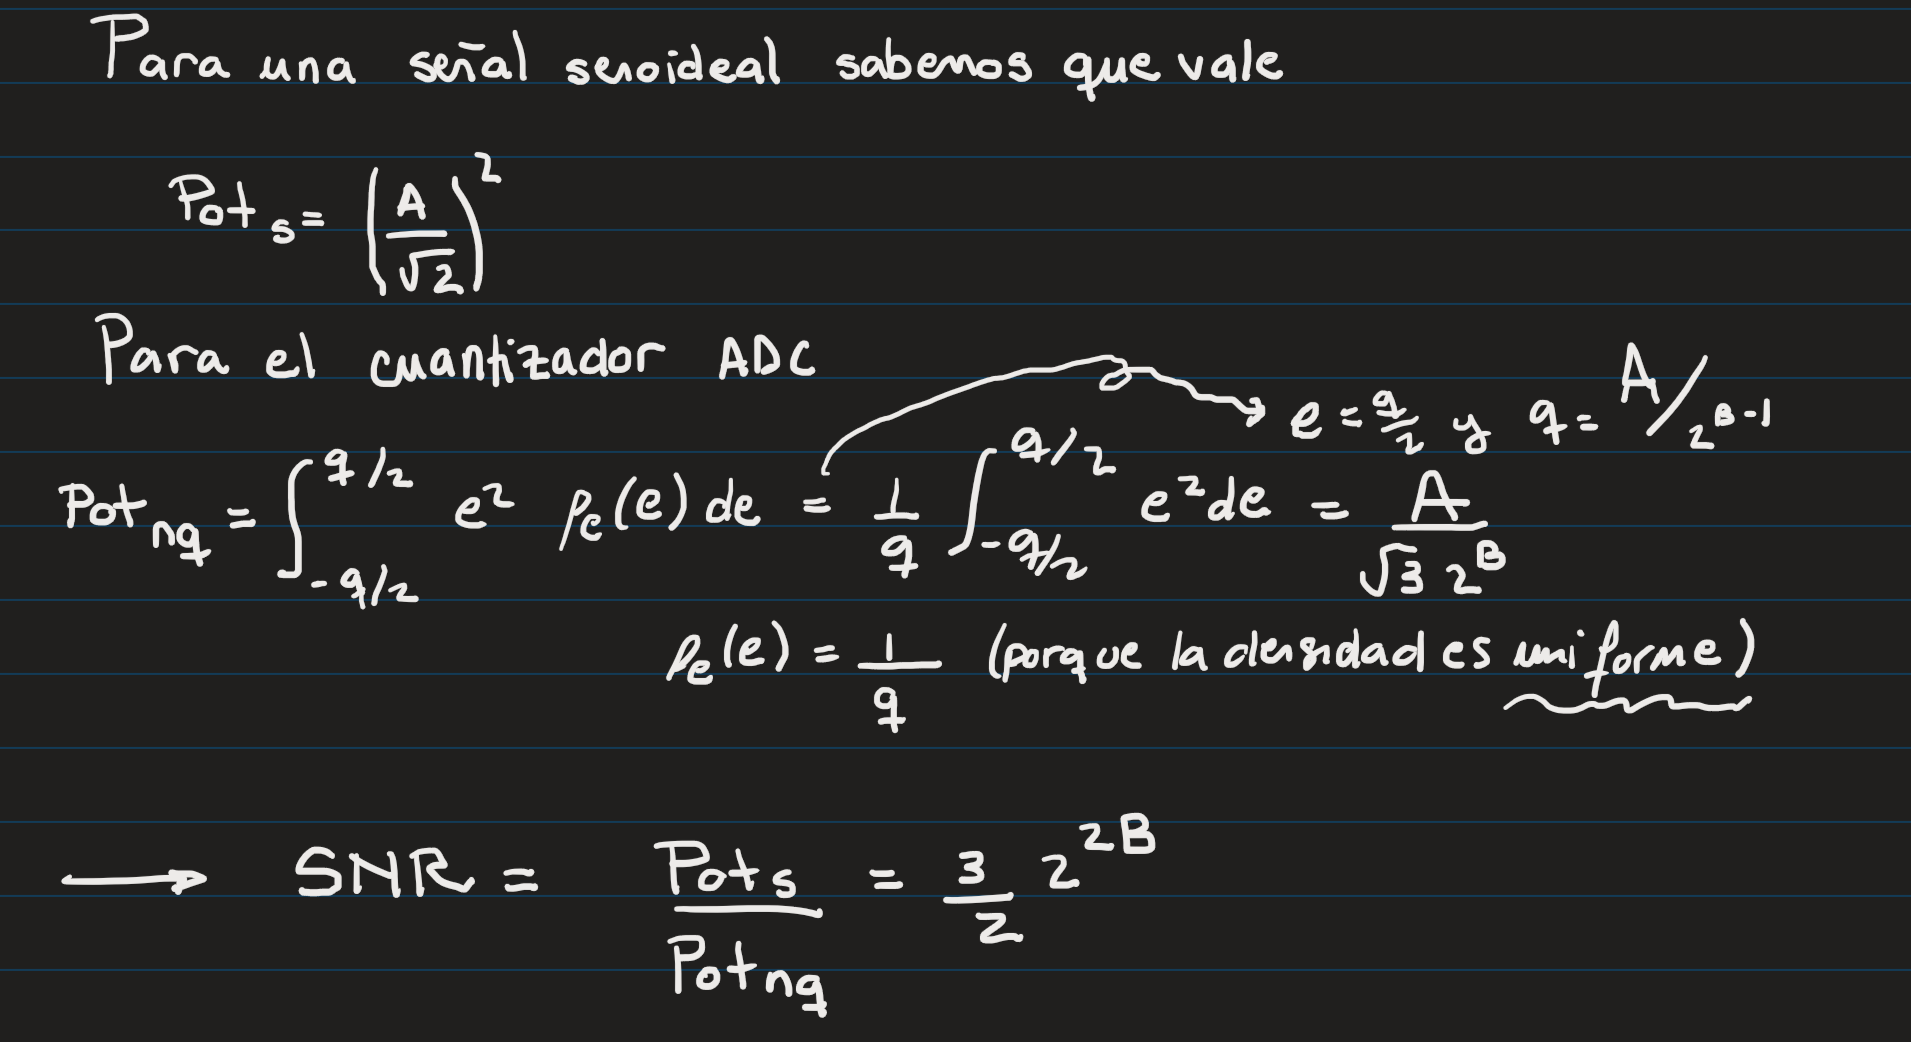


Simulación del Aliasing

cambié la frecuencia de la señal a 800 Hz 

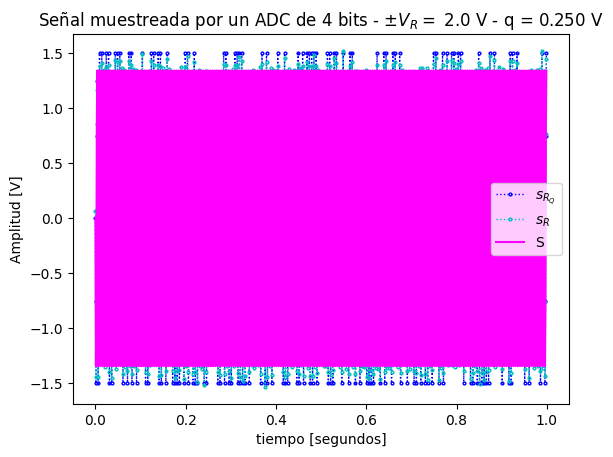

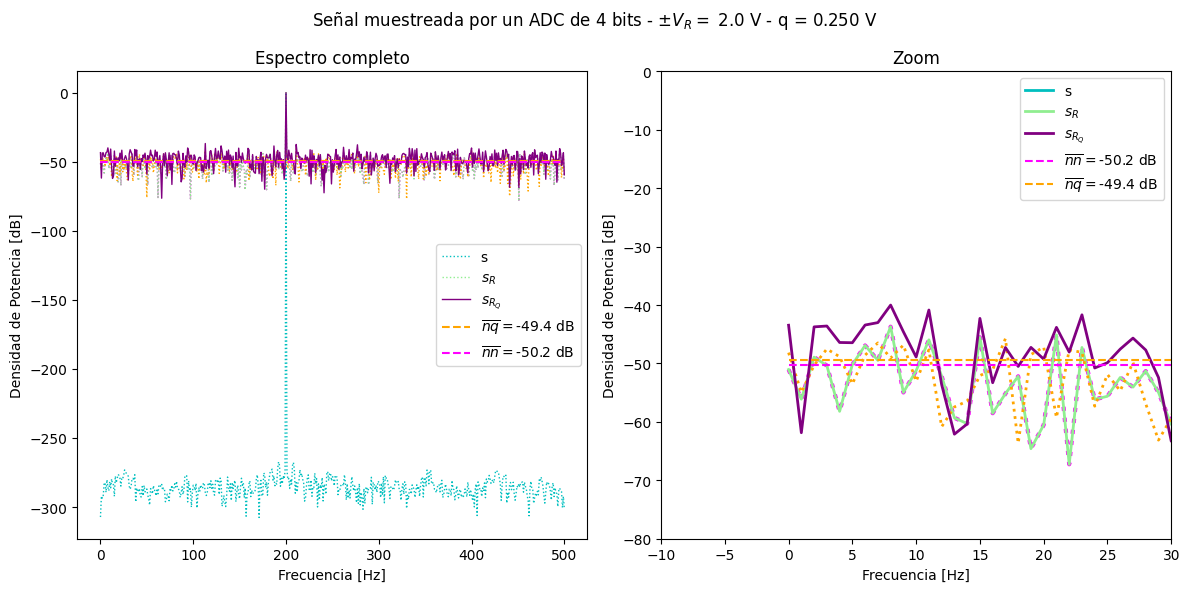

In [30]:

#%% DATOS DE LA SIMULACIÓN

# Datos de la señal y su muestreo
N = 1000 # cantidad de muestras
fs = 1000# frecuencia de muestreo [Hz]
ff = 800 # frecuencia de la señal [Hz]
A_inicial = 1 # amplitud de la señal [Volts] / nota: al normalizar la señal, esta amplitud va a cambiar. Realmente no importa que valor le dé
df = fs / N  # resolución espectral (Hz)
ts = 1 / fs  # tiempo de muestreo (segundos)

# Datos del ADC
B =  4 # bits
Vr = 2 # rango simétrico de +/- Vf Volts
q = 2*Vr/(2**B) # paso de cuantización de q Volts

# Datos del ruido analógico y digital
pot_ruido_cuant = (q**2)/12 # Watts 
kn = 1 # escala de la potencia / relación entre la potencia del ruido analógico y el ruido digital
pot_ruido_analog = pot_ruido_cuant * kn 

# Señales
tt, xx = generador_sen(A_inicial, 0, ff, 0, N, fs) # generador de la señal senoidal
xx=xx/np.std(xx) #normalizo la señal para que tenga potencia 1 W

s = xx # señal pelada
nn = np.random.normal(0,np.sqrt(pot_ruido_analog),N) # ruido analogico
sr = s + nn # señal analógica 
srq = np.round(sr/q)*q # señal digital
nq = srq-sr # ruido digital

#%% Visualización de resultados

# ##################
# # Señal temporal
# ##################

plt.figure(2)

plt.plot(tt, srq, lw=1, linestyle=':', color='blue', marker='o', markersize=2, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='$ s_{R_Q}$')
plt.plot(tt, sr, lw=1, linestyle=':', color='c', marker='o', markersize=2, markerfacecolor='c', markeredgecolor='c', fillstyle='none', label='$ s_R $')
plt.plot(tt, s, color='magenta',label='S') 

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vr, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

# Cálculo de la transformada de Fourier
ft_S = 1/N * np.fft.fft(s)
ft_SR = 1/N * np.fft.fft(sr)
ft_Srq = 1/N * np.fft.fft(srq)
ft_Nq = 1/N * np.fft.fft(nq)
ft_Nn = 1/N * np.fft.fft(nn)

# Grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2

# Cálculo de las medias
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Título de la figura
fig.suptitle('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vr, q))


# Gráfico original en el subplot izquierdo
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=1, color='c',ls=':', label='s')
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn[bfrec])**2), lw=1, color='magenta', ls=':')
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR[bfrec])**2), lw=1, color='lightgreen', ls=':', label='$ s_R $')
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq[bfrec])**2), lw=1, color='orange', ls=':')
ax1.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq[bfrec])**2), lw=1, color='purple', label='$ s_{R_Q}$')
ax1.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean, Nnq_mean])), color='orange', ls='--', label='$ \overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean)))
ax1.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean, nNn_mean])), color='magenta', ls='--', label='$ \overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean)))

ax1.set_title('Espectro completo')
ax1.set_ylabel('Densidad de Potencia [dB]')
ax1.set_xlabel('Frecuencia [Hz]')
ax1.legend()


# Zoom en el subplot derecho

ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec])**2), lw=2, color='c', label='s')
ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn[bfrec])**2), lw=3, color='magenta', ls=':')
ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR[bfrec])**2), lw=2, color='lightgreen', label='$ s_R $')
ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq[bfrec])**2), lw=2, color='orange', ls=':')
ax2.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq[bfrec])**2), lw=2, color='purple', label='$ s_{R_Q}$')
ax2.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([nNn_mean, nNn_mean])), color='magenta', ls='--', label='$ \overline{nn} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * nNn_mean)))
ax2.plot(np.array([ff[bfrec][0], ff[bfrec][-1]]), 10 * np.log10(2 * np.array([Nnq_mean, Nnq_mean])), color='orange', ls='--', label='$ \overline{nq} = $' + '{:3.1f} dB'.format(10 * np.log10(2 * Nnq_mean)))

ax2.set_title('Zoom')
ax2.set_xlim(-10, 30)
ax2.set_ylim(-80, 0)
ax2.set_ylabel('Densidad de Potencia [dB]')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.legend()


plt.tight_layout()
plt.show()




yo lo intente...

#### Apartado sobre IA
Utilicé mistral para hacer codigos latex de la introdución y codear las diferentes configuraciones para el inciso b). Se que podría haberlo resuelto con menos codigo usando un for pero quería que se vieran bien las comparaciones entre cada gráfico y preferí ir por lo seguro y repetir y repetir...